# Quantum Computing tutorial

In this tutorial we are going to use [Qibo](https://github.com/qiboteam/qibo), an open-source full stack API for quantum simulation, control and characterization.

Qibo has different backends to simulate quantum circuits, for our purpose the `numpy` backend is enough.

In [ ]:
from qibo import set_backend
import numpy as np
set_backend("numpy")

## Build your first Quantum Circuit using Qibo

Let's start from a simple circuit containing 1 qubit:



In [ ]:
from qibo import gates
from qibo.models import Circuit

nqubits = 1
circuit = Circuit(nqubits=nqubits)

We can perform a measurement on the circuit by adding a [Measurement Gate](https://github.com/qiboteam/qibo/blob/73256ed1bfb272db509c05ee8333b5ad54825a46/src/qibo/gates/measurements.py#L9)

In [ ]:
circuit.add(gates.M(0))

We can perform a measurement with a fixed number of shots with the folllowing command

In [ ]:
result = circuit(nshots=100)

From the `result` we can retrieve several information about the measurement.


*   Samples: bitstrings measured
*   Frequencies
*   Final state (only for **simulation**)



In [ ]:
result.samples()

In [ ]:
result.frequencies()

### <font color='blue'>Exercise 1</font> 
Which is the initial state of the system?

*Put your answer here*

In [ ]:
print(result)

In QC we can modify the state of a qubit by applying unitary operators. In the quantum circuit paradigm we refer
to those operators as gates.

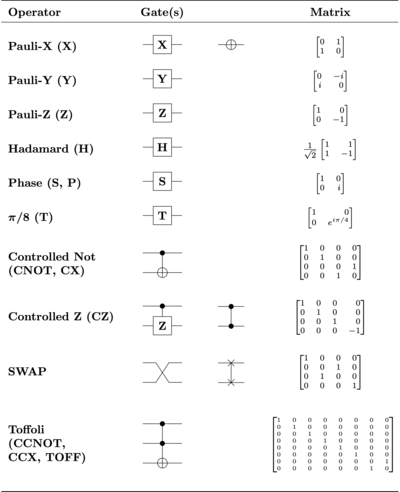
You can check which gates are available in Qibo in the [documentation](https://qibo.science/qibo/stable/api-reference/qibo.html#gates).

## How do you apply gates in Qibo?
You can apply any gate following the same syntax used to perform measurements.


In [ ]:
from qibo import models, gates
circuit = models.Circuit(1)
circuit.add(gates.X(0))
result = circuit()

What is the expected outcome of the previous circuit?

*Put your answer here* 

In [ ]:
# We can check the solution by printing result
print(result)

## Multi-qubit circuits

The generalization to a circuit with more than one qubit it is quite straightforward

In [ ]:
circuit = Circuit(2)
# add a Hadamard gate to all qubits
for q in range(2):
    circuit.add(gates.H(q))
# add a CZ gate
circuit.add(gates.CZ(0, 1))

We can retrieve some information on the circuit with the following methods

In [ ]:
print(circuit.draw())

In [ ]:
print(circuit.summary())

Let's add some measurements and execute the circuit

In [ ]:
circuit.add(gates.M(q) for q in range(2))

print(circuit.draw())


In [ ]:
print(circuit())

### Exercise II: constructing entangled states
It is possible to create entangled states using shallow quantum circuits.

For two qubits the maximally entangled states are known as Bell states:

$$ \ket{\Phi^+} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{0}_B + \ket{1}_A \ket{1}_B)$$
$$ \ket{\Phi^-} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{0}_B - \ket{1}_A \ket{1}_B)$$
$$ \ket{\Psi^+} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{1}_B + \ket{1}_A \ket{0}_B)$$
$$ \ket{\Psi^-} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{1}_B - \ket{1}_A \ket{0}_B)$$

The simplest way to construct the $\ket{\Phi^+}$ is by using a $H$ and a $CNOT$ gate:

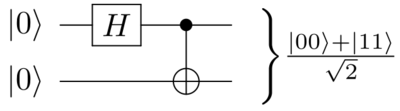





### <font color='blue'>Exercise IIA</font>

Construct the corresponding circuits to create all Bell states.

In [ ]:
def phi_plus_circuit():
    circuit = models.Circuit(2)
    circuit.add(gates.H(0))
    circuit.add(gates.CNOT(0,1))
    return circuit

def phi_minus_circuit():
    circuit = models.Circuit(2)
    circuit.add(gates.H(0))
    circuit.add(gates.Z(0))
    circuit.add(gates.CNOT(0,1))
    return circuit

def psi_plus_circuit():
    circuit = models.Circuit(2)
    circuit.add(gates.H(0))
    circuit.add(gates.X(1))
    circuit.add(gates.CNOT(0,1))
    return circuit

def psi_minus_circuit():
    circuit = models.Circuit(2)
    circuit.add(gates.H(0))
    circuit.add(gates.X(1))
    circuit.add(gates.Z(0))
    circuit.add(gates.CNOT(0,1))
    return circuit

### <font color='blue'>Exercise IIB</font>
Construct the circuit to create the GHZ state:
$$ \ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$$

In [ ]:
def ghz_circuit():
    circuit = models.Circuit(3)
    circuit.add(gates.H(0))
    circuit.add(gates.CNOT(0,1))
    circuit.add(gates.CNOT(0,2))
    return circuit

## Advanced features

### Controlled gates
In Qibo it is possible to control any gate to an arbitrary number of qubits using [`controlled_by`](https://qibo.science/qibo/stable/api-reference/qibo.html#gates).

In QC *to control* a gate with one or more qubits means to condition the execution of a gate on some target qubits depending on the state
of one or more control qubits.

As an example we have already use the CZ gate which acts in the following way:

$$ \text{CZ} \ket{00} = \ket{00}$$
$$ \text{CZ} \ket{01} = \ket{01}$$
$$ \text{CZ} \ket{10} = \ket{10}$$
$$ \text{CZ} \ket{11} = - \ket{11}$$

As we can see the $\text{Z}$ gate is applied to the second qubit only if the first is in the state $\ket{1}$.

Here is an example on how to contrusct a gate controlled by multiple qubits:

In [ ]:
circuit = Circuit(4)
circuit.add(gates.H(q) for q in range(4))
circuit.add(gates.Z(3).controlled_by(0, 1, 2))
circuit.add(gates.RX(2, theta=0.5).controlled_by(1, 3))

print(circuit.draw())

Gates that are controlled on many qubits are applied by indexing the state and not by constructing the whole $2^n \times 2^n$
 matrix representation of the gate, to improve performance and memory requirements

In [ ]:
%%time
nqubits = 15
circuit = Circuit(nqubits)
circuit.add(gates.X(nqubits - 1).controlled_by(*range(nqubits - 1)))
result = circuit()
print(circuit.draw())

In [ ]:
%%time
nqubits = 15
matrix = np.eye(2 ** nqubits, dtype="complex128")
matrix[-2:, -2:] = np.array([[0, 1], [1, 0]])
circuit = Circuit(nqubits)
circuit.add(gates.Unitary(matrix, *range(nqubits)))
result = circuit()
print(circuit.draw())

### Add circuits as subroutines

Using Qibo we also have the possibility to append a smaller circuit with a bigger circuit using the [`on_qubits`](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.gates.abstract.Gate.on_qubits) function

In [ ]:
small_qubits = 2
superposition = models.Circuit(small_qubits)
superposition.add(gates.H(i) for i in range(small_qubits))

In [ ]:
large_qubits = 4
circuit=models.Circuit(large_qubits)
circuit.add(superposition.on_qubits(0,2))
circuit.add(gates.M(i) for i in range(large_qubits))
print(circuit.draw())